**INTRODUCTION TO AUTOML**

Machine learning has seen significant advancement in previous years and an increasing number of fields depend on this.
AutoML simplifies each stage of the ML workflow, making machine learning more accessible.
AutoML automates the laborious, repetitive, and moment work that occurs throughout the machine learning process, from data gathering through model effective implementation, allowing you to focus less on limited minutiae and more on how to use ML to enhance business results. AutoML tools handle data sourcing and preparation, engineering aspects, model training and tuning, model deployment, and continuous model monitoring and updating.

**ABSTRACT**
Netflix is an application that is rapidly expanding in terms of popularity, programs, and content. This is an EDA or narrative telling using data, with a content-based recommendation engine and a variety of graphs and graphics.

**WHAT IS Pycaret**

PyCaret is a Python accessible reduced machine learning toolkit that seeks to shorten the time required to experiment with various machine learning models. PyCaret makes it possible for anybody to create low-code, powerful, end-to-end machine learning systems.

Installing Pycaret and other important libraries.

In [44]:
#Installing Pycaret
# !pip install pycaret[full] --ignore-installed
!pip install pycaret
!pip install numpy==1.20

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.19.5-cp37-cp37m-manylinux2010_x86_64.whl (14.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.0
    Uninstalling numpy-1.20.0:
      Successfully uninstalled numpy-1.20.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.
tensorflow 2.9.2 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
jaxlib 0.3.22+cuda11.cudnn805 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
jax 0.3.23 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
en-core-web-sm 3.4.1 requires spacy<3.5.0,>=3.4.0, but you have spacy 2.3.8 which is incompatible.
cmdstanpy 1.0.8 requires numpy>=1.21, 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.20.0-cp37-cp37m-manylinux2010_x86_64.whl (15.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.20.0 which is incompatible.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.20.0 which is incompatible.
en-core-web-sm 3.4.1 requires spacy<3.5.0,>=3.4.0, but you have spacy 2.3.8 which is incompatible.
cmdstanpy 1.0.8 requires numpy>=1.21, but you have numpy 1.20.0 which is incompatible.


**IMPORTING LIBRABRIES**

In [45]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats #stats library
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization

import warnings #ignore warnings
warnings.filterwarnings('ignore')

**READING DATA**

In [46]:
from google.colab import files 
uploaded = files.upload()

Saving tv_shows.csv to tv_shows (3).csv


In [102]:
tv_shows=pd.read_csv("/content/tv_shows.csv")

**DATA SET: tv_shows**

We are reviewing and working on IMDb ratings in the supplied data set.

**DATA PROFILE**

In [103]:
tv_shows.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1


In [104]:
#finding data types
tv_shows.dtypes

Unnamed: 0          int64
ID                  int64
Title              object
Year                int64
Age                object
IMDb               object
Rotten Tomatoes    object
Netflix             int64
Hulu                int64
Prime Video         int64
Disney+             int64
Type                int64
dtype: object

The following dataset has the given set of data types: index int64 Unnamed: 0 int64 ID int64 Title object Year int64 Age object IMDb float64 Rotten Tomatoes float64 Netflix int64 Hulu int64 Prime Video int64 Disney+ int64 Type int64

In [105]:
#finding missing values
tv_shows.isnull().sum()

Unnamed: 0            0
ID                    0
Title                 0
Year                  0
Age                2127
IMDb                962
Rotten Tomatoes       0
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
Type                  0
dtype: int64

The missing values are mentioned as, that is Age and IMDb. Unnamed: 0 0 ID 0 Title 0 Year 0 Age 2127 IMDb 962 Rotten Tomatoes 0 Netflix 0 Hulu 0 Prime Video 0 Disney+ 0 Type 0

**ANALYZING THE NUMERIC FEATURES**

In [106]:
#Converting Rotten Tomatoes
tv_shows = tv_shows.dropna(subset=["IMDb"])
tv_shows["IMDb"]= tv_shows["IMDb"].str.extract('(\d+)').astype(float)
tv_shows["Rotten Tomatoes"]= tv_shows['Rotten Tomatoes'].str.extract('(\d+)').astype(float)
tv_shows.drop(columns=["Unnamed: 0","ID","Title","Type"],inplace=True)

In [107]:
tv_shows.dtypes

Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes    float64
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5cbe2e2b50>]],
      dtype=object)

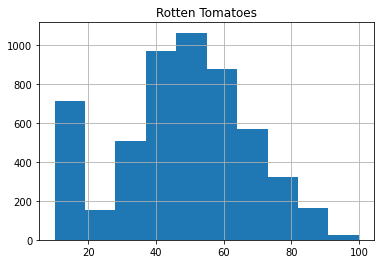

In [66]:
#Calculating the numeric values
tv_shows.hist(column='Rotten Tomatoes')

*OBSERVATION*
Rotten Tomatoes almost follows a Normal Distribution.

**OUTLIERS**

In [68]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler() # Normalization
tv_shows=pd.get_dummies(tv_shows)
tv_shows['Rotten Tomatoes']= mms.fit_transform(tv_shows[['Rotten Tomatoes']])
tv_shows['Year']= mms.fit_transform(tv_shows[['Year']])

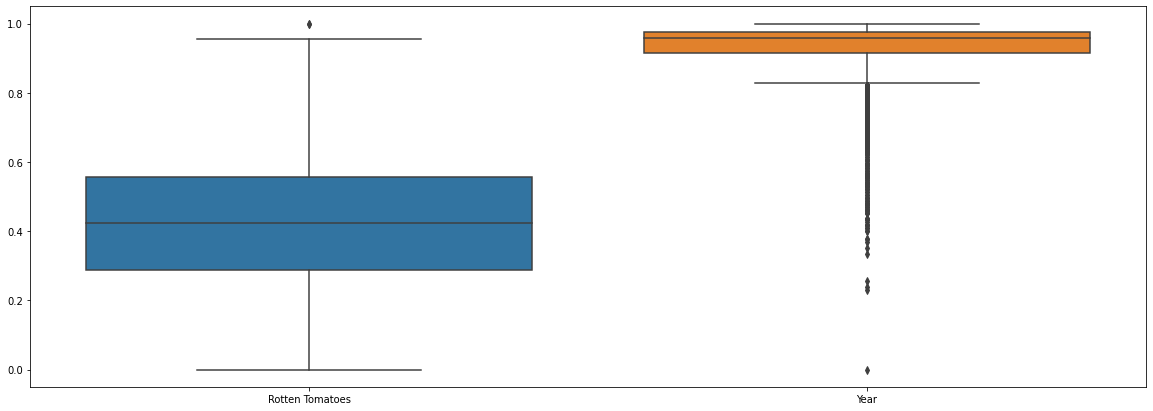

In [69]:
plt.figure(figsize=(20,7))
sns.boxplot(data=tv_shows[['Rotten Tomatoes','Year']])

*OBSERVATION*
Outliers are present in the data.

*ACTION*
We need to eliminate outliers


**MULTICOLINEARITY**

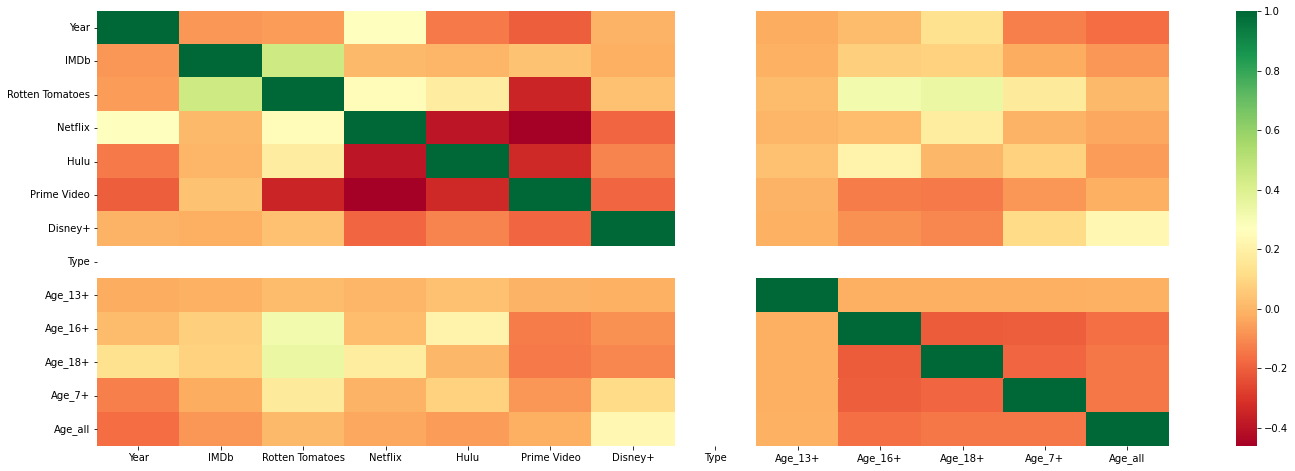

In [70]:
#the heat map of the correlation
shows_dummies=pd.get_dummies(tv_shows)
plt.figure(figsize=(24,8))
corr = shows_dummies.corr()
sns.heatmap(corr, cmap='RdYlGn')

*OBSERVATION*
There is multicolinearity because predictor variables are connected to one another.

*ACTION*
Removing some of the category factors that are closely associated.

**REGRESSION**

In [72]:
from pycaret.regression import *

In [108]:
tv_shows

,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,2008,18+,9.0,100.0,1,0,0,0
1,2016,16+,8.0,96.0,1,0,0,0
2,2013,18+,9.0,95.0,1,1,0,0
3,2015,18+,8.0,94.0,1,0,0,0
4,2017,16+,8.0,93.0,1,0,0,0
...,...,...,...,...,...,...,...,...
5339,2018,7+,7.0,30.0,0,0,0,1
5340,2018,all,3.0,30.0,0,0,0,1
5341,2020,all,5.0,29.0,0,0,0,1
5342,2018,all,7.0,28.0,0,0,0,1


**SETTING UP THE CLASSIFIER**

In [109]:
reg = setup(data = tv_shows, 
            target = 'IMDb',
            normalize=True,
            normalize_method='minmax',
            remove_multicollinearity=True,
            fold=3,
            transform_target=True,
            silent = True)

,Description,Value
0,session_id,1976
1,Target,IMDb
2,Original Data,"(4406, 8)"
3,Missing Values,True
4,Numeric Features,2
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3084, 12)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='IMDb',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                ('dummy', Dummify(target='IMDb')),
                ('fix_perfect', Remove_100(target='IMDb')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough

**MODEL COMPARISON AND EVALUATION**

Going to look for the finest models.

In [110]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.7561,1.0265,1.0124,0.2375,0.1562,0.1399,0.1633
huber,Huber Regressor,0.7613,1.0413,1.0197,0.2266,0.1572,0.1410,1.0367
lar,Least Angle Regression,0.7617,1.0459,1.0219,0.2232,0.1577,0.1416,0.0367
lr,Linear Regression,0.7621,1.0460,1.0220,0.2231,0.1577,0.1416,2.0933
ridge,Ridge Regression,0.7619,1.0471,1.0225,0.2224,0.1579,0.1417,0.0300
br,Bayesian Ridge,0.7619,1.0470,1.0224,0.2224,0.1579,0.1417,0.0333
lightgbm,Light Gradient Boosting Machine,0.7689,1.0566,1.0274,0.2143,0.1570,0.1408,0.3333
ada,AdaBoost Regressor,0.7928,1.0932,1.0447,0.1883,0.1614,0.1480,0.0733
omp,Orthogonal Matching Pursuit,0.7842,1.0943,1.0450,0.1880,0.1608,0.1457,0.0300
knn,K Neighbors Regressor,0.8090,1.1540,1.0736,0.1418,0.1629,0.1475,0.1067


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 2
INFO:logs:PowerTransformedTargetRegressor(alpha=0.9, ccp_alpha=0.0,
                                criterion='friedman_mse', init=None,
                                learning_rate=0.1, loss='ls', max_depth=3,
                                max_features=None, max_leaf_nodes=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100,
                                n_iter_no_change=None,
                                power_transformer_method...
                                                                    max_leaf_nodes=None,
                                                                    min_impurity_decrease=0.0,
                                           

**CREATING A MODEL**

Lets utilize the Light GBM model in this case since it works effectively and is operationally cheap and fast.

In [111]:
lgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.7645,1.0354,1.0175,0.2024,0.1534,0.1375
1,0.7905,1.1464,1.0707,0.2384,0.1699,0.1535
2,0.7516,0.9881,0.9940,0.2019,0.1479,0.1313
Mean,0.7689,1.0566,1.0274,0.2143,0.1570,0.1408
Std,0.0162,0.0663,0.0321,0.0171,0.0094,0.0094


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 3
INFO:logs:PowerTransformedTargetRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                random_state=1...
                                                        importance_type='split',
                                                        learning_rate=0.1,
                                                        max_depth=-1,
                                  

**HYPERPARAMETER TUNING**

In [112]:
tuned_model = tune_model(lgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.7561,1.0058,1.0029,0.2252,0.1517,0.1364
1,0.7809,1.1311,1.0635,0.2486,0.1698,0.1533
2,0.7390,0.9505,0.9749,0.2323,0.1475,0.1319
Mean,0.7587,1.0292,1.0138,0.2354,0.1563,0.1405
Std,0.0172,0.0756,0.0370,0.0098,0.0097,0.0092


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 4
INFO:logs:PowerTransformedTargetRegressor(bagging_fraction=0.6, bagging_freq=1,
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, feature_fraction=1.0,
                                importance_type='split', learning_rate=0.2,
                                max_depth=-1, min_child_samples=16,
                                min_child_weight=0.001, min_split_gain=0.9,
                                n_estimators=260, n_jobs=-1, num_leaves=2,
                                objective=None,
                                power_transformer_method='bo...
                                                        importance_type='split',
                                                        learning_rate=0.2,
                                                        max_depth=-1,
                                 

*OBSERVATION*



**PLOTTING THE RESIDUALS**

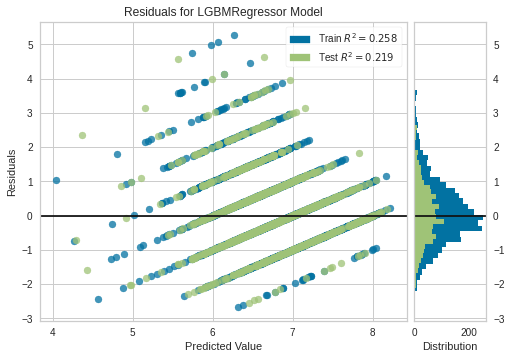

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [114]:
plot_model(estimator = tuned_model, plot = 'residuals')

*OBSERVATION*

The distribution of residuals is not evenly spread

**FEATURE IMPORTANCE**

Plotting feature importance.

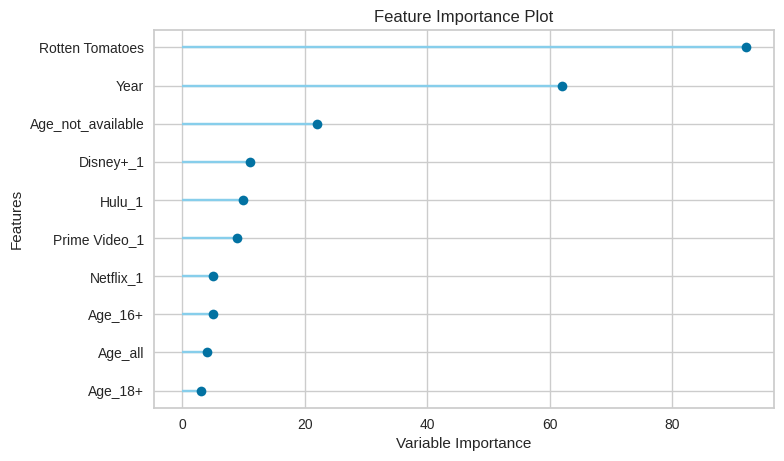

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [113]:
plot_model(estimator = tuned_model, plot = 'feature')

**Classification**

In [116]:
tv_shows['IMDb'].median()

7.0

In [117]:
tv_shows['score'] = np.where(tv_shows['IMDb']>= 7, "Good", "Bad")

In [119]:
tv_shows2=tv_shows.drop(columns=["IMDb"])

In [120]:
tv_shows

,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,score
0,2008,18+,9.0,100.0,1,0,0,0,Good
1,2016,16+,8.0,96.0,1,0,0,0,Good
2,2013,18+,9.0,95.0,1,1,0,0,Good
3,2015,18+,8.0,94.0,1,0,0,0,Good
4,2017,16+,8.0,93.0,1,0,0,0,Good
...,...,...,...,...,...,...,...,...,...
5339,2018,7+,7.0,30.0,0,0,0,1,Good
5340,2018,all,3.0,30.0,0,0,0,1,Bad
5341,2020,all,5.0,29.0,0,0,0,1,Bad
5342,2018,all,7.0,28.0,0,0,0,1,Good


In [122]:
#importing classification
from pycaret.classification import *

**SETTING UP CLASSIFIER**

In [123]:
clf1 = setup(data = tv_shows2, 
             target = 'score',
             normalize=True,
             normalize_method='minmax',
             remove_multicollinearity=True,
             fold=5,
             silent = True)

,Description,Value
0,session_id,5749
1,Target,score
2,Target Type,Binary
3,Label Encoded,"Bad: 0, Good: 1"
4,Original Data,"(4406, 8)"
5,Missing Values,True
6,Numeric Features,2
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='score',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                ('dummy', Dummify(target='score')),
                ('fix_perfect', Remove_100(target='score')),
                ('clean_names', Clean_Colum_Names()),
       

**MODEL COMPARISON AND EVALUATION**

In [124]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6913,0.7566,0.7920,0.7350,0.7623,0.3238,0.3260,0.220
ada,Ada Boost Classifier,0.6897,0.7530,0.8003,0.7296,0.7633,0.3157,0.3186,0.168
lr,Logistic Regression,0.6842,0.7406,0.8247,0.7145,0.7655,0.2893,0.2965,0.886
lda,Linear Discriminant Analysis,0.6825,0.7407,0.8112,0.7179,0.7616,0.2917,0.2967,0.028
ridge,Ridge Classifier,0.6809,0.0000,0.8195,0.7131,0.7625,0.2834,0.2901,0.024
lightgbm,Light Gradient Boosting Machine,0.6770,0.7391,0.7666,0.7303,0.7479,0.2993,0.3002,0.220
svm,SVM - Linear Kernel,0.6693,0.0000,0.8376,0.6977,0.7584,0.2414,0.2617,0.028
knn,K Neighbors Classifier,0.6624,0.6870,0.7526,0.7200,0.7359,0.2689,0.2694,0.158
rf,Random Forest Classifier,0.6355,0.6859,0.7184,0.7044,0.7112,0.2173,0.2175,0.684
nb,Naive Bayes,0.6346,0.6894,0.8786,0.6566,0.7498,0.1164,0.1299,0.022


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=5749, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


**CREATING A MODEL**

In [125]:
lgbm=create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6564,0.7242,0.7435,0.7175,0.7303,0.2575,0.2578
1,0.6856,0.7439,0.7617,0.7424,0.7519,0.3229,0.3231
2,0.6872,0.7613,0.7979,0.7281,0.7614,0.3101,0.3128
3,0.6807,0.7477,0.7688,0.7327,0.7503,0.3083,0.3090
4,0.6753,0.7183,0.7610,0.7307,0.7455,0.2976,0.2981
Mean,0.6770,0.7391,0.7666,0.7303,0.7479,0.2993,0.3002
Std,0.0111,0.0158,0.0177,0.0080,0.0102,0.0224,0.0226


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5749, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


**HYPERPARAMETER TUNING**

In [126]:
tuned_model = tune_model(lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6726,0.7347,0.7539,0.7312,0.7423,0.2937,0.2940
1,0.6888,0.7556,0.7798,0.7377,0.7582,0.3228,0.3237
2,0.7050,0.7690,0.8109,0.7417,0.7748,0.3500,0.3529
3,0.6985,0.7609,0.8156,0.7319,0.7715,0.3324,0.3366
4,0.6818,0.7418,0.7922,0.7245,0.7568,0.2994,0.3019
Mean,0.6894,0.7524,0.7905,0.7334,0.7607,0.3197,0.3218
Std,0.0116,0.0125,0.0224,0.0059,0.0116,0.0209,0.0217


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:LGBMClassifier(bagging_fraction=0.7, bagging_freq=1, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=46, min_child_weight=0.001, min_split_gain=0.1,
               n_estimators=40, n_jobs=-1, num_leaves=30, objective=None,
               random_state=5749, reg_alpha=0.4, reg_lambda=0.15, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


**PLOTTING AREA UNDER CURVE**

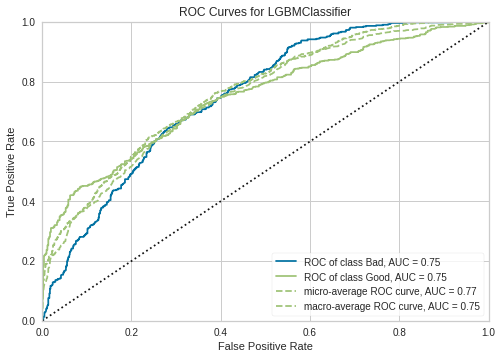

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [127]:
#Plotting Area under Curve
plot_model(estimator = tuned_model, plot = 'auc')

**PLOTTING FEATURE IMPORTANCE**

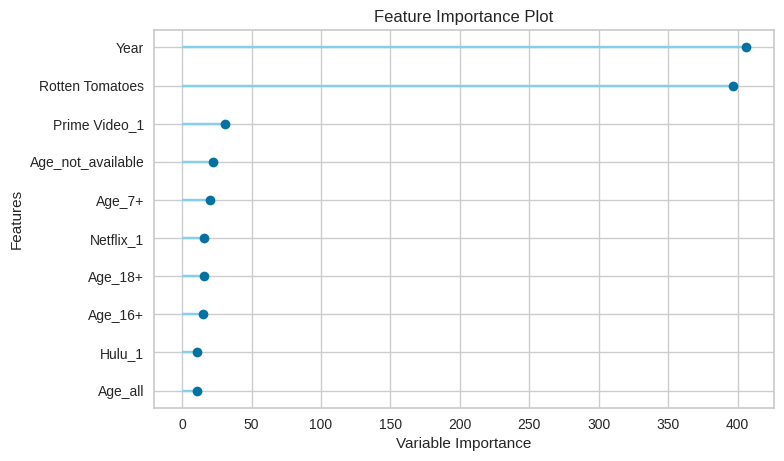

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [128]:
#Plotting Feature Importance
plot_model(estimator = tuned_model, plot = 'feature')

**MULTICLASS CLASSIFICATION**

In [132]:
tv_shows['IMDb'].quantile(0.3)

6.0

In [134]:
tv_shows['IMDb'].quantile(0.8)

8.0

In [143]:
tv_shows['score'] = np.where(tv_shows['IMDb']>=8, "Good", "Medium")
tv_shows['score'] = np.where(tv_shows['IMDb']<=6 , "Bad", tv_shows['score'])

In [144]:
tv_shows

,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,score
0,2008,18+,9.0,100.0,1,0,0,0,Good
1,2016,16+,8.0,96.0,1,0,0,0,Good
2,2013,18+,9.0,95.0,1,1,0,0,Good
3,2015,18+,8.0,94.0,1,0,0,0,Good
4,2017,16+,8.0,93.0,1,0,0,0,Good
...,...,...,...,...,...,...,...,...,...
5339,2018,7+,7.0,30.0,0,0,0,1,Medium
5340,2018,all,3.0,30.0,0,0,0,1,Bad
5341,2020,all,5.0,29.0,0,0,0,1,Bad
5342,2018,all,7.0,28.0,0,0,0,1,Medium


In [145]:
tv_shows3=tv_shows.drop(columns=["IMDb"])

**SETTING UP CLASSIFIER**

In [146]:
clf1 = setup(data = tv_shows3, 
             target = 'score',
             normalize=True,
             normalize_method='minmax',
             remove_multicollinearity=True,
             fold=5,
             silent = True)

,Description,Value
0,session_id,1629
1,Target,score
2,Target Type,Multiclass
3,Label Encoded,"Bad: 0, Good: 1, Medium: 2"
4,Original Data,"(4406, 8)"
5,Missing Values,True
6,Numeric Features,2
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='score',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                ('dummy', Dummify(target='score')),
                ('fix_perfect', Remove_100(target='score')),
                ('clean_names', Clean_Colum_Names()),
       

**MODEL COMPARISON AND EVALUATION**

In [147]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.5519,0.7144,0.5212,0.5633,0.5420,0.2907,0.2960,0.776
lr,Logistic Regression,0.5415,0.6969,0.5189,0.5482,0.5368,0.2786,0.2814,0.136
ada,Ada Boost Classifier,0.5392,0.6698,0.5127,0.5495,0.5307,0.2723,0.2770,0.168
lda,Linear Discriminant Analysis,0.5392,0.6958,0.5223,0.5405,0.5359,0.2798,0.2813,0.028
ridge,Ridge Classifier,0.5386,0.0000,0.5147,0.5418,0.5292,0.2746,0.2793,0.022
lightgbm,Light Gradient Boosting Machine,0.5263,0.6901,0.5034,0.5286,0.5206,0.2561,0.2585,0.188
svm,SVM - Linear Kernel,0.5088,0.0000,0.4908,0.5357,0.4843,0.2322,0.2485,0.076
knn,K Neighbors Classifier,0.5010,0.6510,0.4827,0.4952,0.4915,0.2229,0.2262,0.166
rf,Random Forest Classifier,0.4890,0.6541,0.4769,0.4879,0.4872,0.2075,0.2081,0.750
et,Extra Trees Classifier,0.4822,0.6280,0.4710,0.4798,0.4796,0.1986,0.1991,0.700


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1629, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


**CREATING A MODEL**

In [148]:
lgbm=create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5446,0.7087,0.5260,0.5472,0.5422,0.2876,0.2891
1,0.5429,0.6972,0.5123,0.5461,0.5335,0.2784,0.2824
2,0.5267,0.6831,0.5043,0.5239,0.5211,0.2594,0.2611
3,0.5138,0.6747,0.4892,0.5203,0.5070,0.2337,0.2368
4,0.5032,0.6868,0.4850,0.5056,0.4992,0.2216,0.2233
Mean,0.5263,0.6901,0.5034,0.5286,0.5206,0.2561,0.2585
Std,0.0161,0.0118,0.0150,0.0160,0.0160,0.0253,0.0254


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1629, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


**HYPERPARAMETER TUNING**

In [149]:
tuned_model = tune_model(lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5689,0.7299,0.5431,0.5804,0.5638,0.3198,0.3237
1,0.5721,0.7100,0.5336,0.5921,0.5577,0.3189,0.3270
2,0.5462,0.6959,0.5144,0.5557,0.5348,0.2814,0.2872
3,0.5219,0.7152,0.4937,0.5427,0.5106,0.2419,0.2484
4,0.5438,0.7087,0.5153,0.5520,0.5352,0.2795,0.2840
Mean,0.5506,0.7119,0.5200,0.5646,0.5404,0.2883,0.2941
Std,0.0184,0.0110,0.0171,0.0186,0.0189,0.0290,0.0290


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:LGBMClassifier(bagging_fraction=0.5, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=26, min_child_weight=0.001, min_split_gain=0.4,
               n_estimators=150, n_jobs=-1, num_leaves=4, objective=None,
               random_state=1629, reg_alpha=1e-06, reg_lambda=0.3,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


**PLOTTING THE CONFUSION MATRIX**

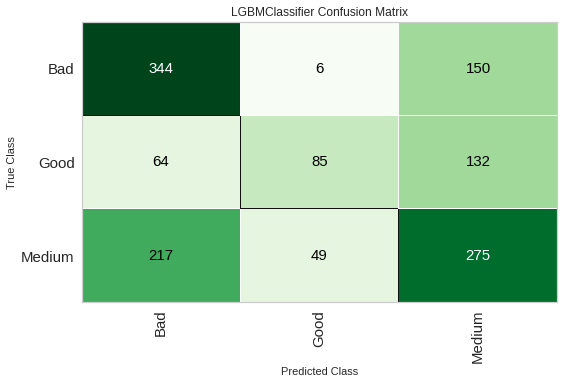

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [150]:
#Plotting the confusion Matrix
plot_model(estimator = tuned_model, plot = 'confusion_matrix')

*OBSERVATION*


**PLTTING FEATURE IMPORTANCE**

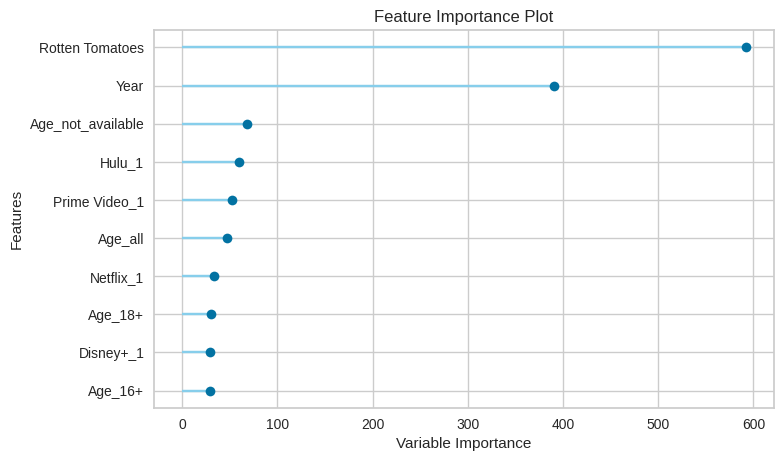

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [151]:
#Plotting Feature Importance
plot_model(estimator = tuned_model, plot = 'feature')

#**ANSWERS TO MODEL USED FOR BINARY CLASSIFICATION**


Is the relationship significant?
-> Yes, the relationship is significant in to seperate the good and bad movies using the independent variables.

Are any model assumptions violated?
-> We have used the Pycaret library for the avoiding any model violation

1. Normalized the numeric predictor variables
2. We have fixed the class imbalance.
3. Adjust the train-test split to ensure that there is enough training and test data.
4. To reduce test set bias, use 5 fold cross validation.
5. Remove the model's multicolinearity.

Is there any multicollinearity in the model?
-> Yes, multicolinearity exists in the data.


In the multivariate models are predictor variables independent of all the other predictor variables?
-> Predictor variables in the data are dependent on one another. 

To reduce the strongly corelated predictor variables, we utilize remove_multicolinearity.

In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.
-> The most important features are Rotten Tomatoes, Year, Age, hulu.

We have exluded the insignificant ones by setting Remove perfect colinearity, remove multicolinearity and feature selection to True.

Does the model make sense?
-> Yes, the model is able categorize and easily seperate the good movies from the bad ones.

Does regularization help?
-> Yes regularization increased the F1 score of the Light GBM model signficantly.

Which independent variables are significant?
-> Rotten Tomatoes, Year, Age, hulu

Which hyperparameters are important?
->The number of estimators, Bagging Fraction, Minimum Child Samples, regularization parameters alpha and lambda, etc are important hyperparameters

# **Answers for model used for Multiclass Classification**

Is the relationship significant?
-> Yes, the model is able to categorize the good, bad and medium movies with very minimal misclassification using the dependent variable

Are any model assumptions violated?
-> Assumptions for models like linear regression:

There is a linear relationship

Standardized/Normalized input predictor variables

No or minimal multicolinearity exists among predictor variables

Training size is sufficiently large.

While Setting up the classifier, we have normalized the predictors, attempted to eliminate multicolinearity, fixed class imbalance, adjust the train test split to avoid any model violations.

Is there any multicollinearity in the model?
-> Yes, multicolinearity exists in the data.

In the multivariate models are predictor variables independent of all the other predictor variables?
-> In the data, predictor variables are depedent on each other. We use remove_multicolinearity to eliminate the highly corelated predictor variables

In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.
-> The most important features are

Does the model make sense?
-> Yes, the model is able to classify the good and the bad movies.

Does regularization help?
-> Yes regularization increased the F1 score of the Light GBM model signficantly

Which independent variables are significant?
-> Rotten tomatoes, hulu, year and age are important

Which hyperparameters are important?
->The number of estimators, regularization parameters alpha and lambda, etc are important hyperparameters

#**Answers for Regression Model**

Is the relationship significant?
-> Yes, the relationship is significant in to predict the IMDB rating using the independent variables.

Are any model assumptions violated?
-> We have used the Pycaret library for the avoiding any model violation

1. Normalized the numeric predictor variables
2. Adjust the train test split to ensure sufficient training and test data size
3. Use 5 fold cross validation to eliminate any test set bias.
4. Remove multicolinearity from the model.
5. Tranform the target variable using box cox

Is there any multicollinearity in the model?
-> Yes, multicolinearity exists in the data.

In the multivariate models are predictor variables independent of all the other predictor variables?
-> In the data, predictor variables are depedent on each other. 

We use remove_multicolinearity to eliminate the highly corelated predictor variables

In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.
-> The most significant predictor variables are as follows:
age
hulu
year
rotten tomatoes


-> To eliminate insignificant features from the model we set remove perfect colinearity, remove multicolinearity and feature selection to True while setting up the Pycaret model.

Does the model make sense?
-> Yes, the model predicts the IMDb scores.

Does regularization help?
-> Yes regularization reduced the mae value.

Which independent variables are significant?
-> Hulu, Age, Year and Rotten Tomatoes are important independent variable for predicting the Monthly Charges.

Which hyperparameters are important?
->The number of estimators, bagging fraction, bagging frequency, regularization parameters alpha and lambda are important hyperparameters

#**CONCLUSION**
We used the pycaret library to automate our ML workflow.
